In [2]:
from google.colab import drive
drive.mount("/content/drive",force_remount=True)

Mounted at /content/drive


In [4]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import os
from os import listdir

In [11]:
#train
Xtrain=[]
Ytrain=[]
leftSign="/content/drive/MyDrive/Train/LeftSign"
RightSign="/content/drive/MyDrive/Train/RightSign"
Stop="/content/drive/MyDrive/Train/Stop"
for images in os.listdir(leftSign):
    img_path = os.path.join(leftSign, images)
    img=image.load_img(img_path)
    img2=img.resize((100,100))
    array=np.array(img2)
    array1=array.reshape(-1)
    Xtrain.append(array1)
    Ytrain.append(1)
for images in os.listdir(RightSign):
    img_path = os.path.join(RightSign, images)
    img=image.load_img(img_path)
    img2=img.resize((100,100))
    array=np.array(img2)
    array1=array.reshape(-1)
    Xtrain.append(array1)
    Ytrain.append(0)
for images in os.listdir(Stop):
    img_path = os.path.join(Stop, images)
    img=image.load_img(img_path)
    img2=img.resize((100,100))
    array=np.array(img2)
    array1=array.reshape(-1)
    Xtrain.append(array1)
    Ytrain.append(2)
Xtrain=np.array(Xtrain)
Ytrain=np.array(Ytrain)

In [10]:
#test
Xtest=[]
Ytest=[]
leftSign="/content/drive/MyDrive/Test/LeftSign"
RightSign="/content/drive/MyDrive/Test/RightSign"
Stop="/content/drive/MyDrive/Test/Stop"
for images in os.listdir(leftSign):
    img_path = os.path.join(leftSign, images)
    img=image.load_img(img_path)
    img2=img.resize((100,100))
    array=np.array(img2)
    array1=array.reshape(-1)
    Xtest.append(array1)
    Ytest.append(1)
for images in os.listdir(RightSign):
    img_path = os.path.join(RightSign, images)
    img=image.load_img(img_path)
    img2=img.resize((100,100))
    array=np.array(img2)
    array1=array.reshape(-1)
    Xtest.append(array1)
    Ytest.append(0)
for images in os.listdir(Stop):
    img_path = os.path.join(Stop, images)
    img=image.load_img(img_path)
    img2=img.resize((100,100))
    array=np.array(img2)
    array1=array.reshape(-1)
    Xtest.append(array1)
    Ytest.append(2)
Xtest=np.array(Xtest)
Ytest=np.array(Ytest)

In [13]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import metrics
from sklearn.metrics import precision_score,accuracy_score,recall_score,f1_score,confusion_matrix,ConfusionMatrixDisplay
import matplotlib.pyplot as plt

KNN Model with k= 2
Accuracy: 0.8223495702005731
recision:  0.8417332163750502
Recall:  0.8223495702005731
F1 Score:  0.8266392681789396


ValueError: The number of FixedLocator locations (3), usually from a call to set_ticks, does not match the number of labels (2).

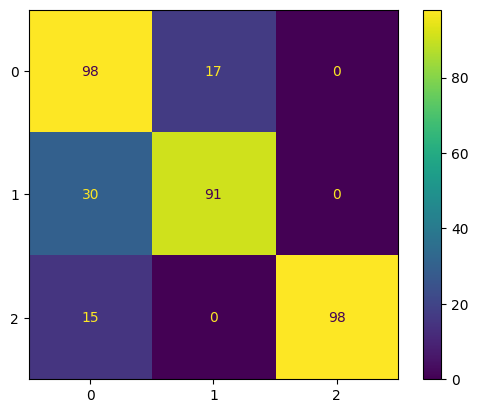

In [19]:
K=2
knn = KNeighborsClassifier(n_neighbors=K)
knn.fit(Xtrain,Ytrain)

y_pred = knn.predict(Xtest)

    # Calculate evaluation metrics
accuracy = accuracy_score(Ytest, y_pred)
precision = precision_score(Ytest, y_pred,average='weighted')
recall = recall_score(Ytest, y_pred,average='weighted')
f1 = f1_score(Ytest, y_pred,average='weighted')

cm = confusion_matrix(Ytest, y_pred)

print("KNN Model with k=",K)
print("Accuracy:",accuracy)
print("recision: ",precision)
print("Recall: ",recall)
print("F1 Score: ",f1)
confusion_test_plot = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=(False, True))
confusion_test_plot. plot()
plt.show()